<a href="https://colab.research.google.com/github/madukanadeeshani/Age-Detection/blob/master/OpenFace3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from os.path import exists, join, basename, splitext

# New Section

In [ ]:
################# Need to revert back to CUDA 10.0 ##################
# Thanks to http://aconcaguasci.blogspot.com/2019/12/setting-up-cuda-100-for-mxnet-on-google.html
#Uninstall the current CUDA version
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-331-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-cg-toolkit' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common-390' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common-410' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common-415' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common-418' for glob 'nvidia*'
Note, selecting 'nvidi

In [ ]:
#Download CUDA 10.0
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb

--2020-07-06 16:23:43--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2940 (2.9K) [application/x-deb]
Saving to: ‘cuda-repo-ubuntu1804_10.0.130-1_amd64.deb’

cuda-repo-ubuntu180 100%[===================>]   2.87K  --.-KB/s    in 0s      

2020-07-06 16:23:43 (108 MB/s) - ‘cuda-repo-ubuntu1804_10.0.130-1_amd64.deb’ saved [2940/2940]



In [ ]:
#install CUDA kit dpkg
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0

Selecting previously unselected package cuda-repo-ubuntu1804.
(Reading database ... 118958 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1804_10.0.130-1_amd64.deb ...
Unpacking cuda-repo-ubuntu1804 (10.0.130-1) ...
Setting up cuda-repo-ubuntu1804 (10.0.130-1) ...

Configuration file '/etc/apt/sources.list.d/cuda.list'
 ==> File on system created by you or by a script.
 ==> File also in package provided by package maintainer.
   What would you like to do about it ?  Your options are:
    Y or I  : install the package maintainer's version
    N or O  : keep your currently-installed version
      D     : show the differences between the versions
      Z     : start a shell to examine the situation
 The default action is to keep your current version.
*** cuda.list (Y/I/N/O/D/Z) [default=N] ? n
Executing: /tmp/apt-key-gpghome.Bbp0qMpaSS/gpg.1.sh --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
gpg: request

In [ ]:
#Slove libcurand.so.10 error
!wget --no-clobber http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
#-nc, --no-clobber: skip downloads that would download to existing files.
!apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
!apt-get update
####################################################################

--2020-07-06 16:38:25--  http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2926 (2.9K) [application/x-deb]
Saving to: ‘nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb’

nvidia-machine-lear 100%[===================>]   2.86K  --.-KB/s    in 0s      

2020-07-06 16:38:25 (327 MB/s) - ‘nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb’ saved [2926/2926]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-machine-learning-repo-ubuntu1804' instead of './nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb'
The following NEW packages will be installed:
  nvidi

In [ ]:
git_repo_url = 'https://github.com/TadasBaltrusaitis/OpenFace.git'
project_name = splitext(basename(git_repo_url))[0]
# clone openface
!git clone -q --depth 1 $git_repo_url

fatal: destination path 'OpenFace' already exists and is not an empty directory.


In [ ]:
# install new CMake becaue of CUDA10
!wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
!tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local

In [ ]:
# Get newest GCC
!sudo apt-get update
!sudo apt-get install build-essential 
!sudo apt-get install g++-8


Ign:1 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,845 kB]
Fetche

In [ ]:
# install python dependencies
!pip install -q youtube-dl

     |████████████████████████████████| 1.8MB 8.9MB/s 


In [ ]:
# Finally, actually install OpenFace
!cd OpenFace && bash ./download_models.sh && sudo bash ./install.sh

Streaming output truncated to the last 5000 lines.
  inflating: opencv-4.1.0/samples/dnn/object_detection.cpp  
  inflating: opencv-4.1.0/samples/dnn/object_detection.py  
  inflating: opencv-4.1.0/samples/dnn/openpose.cpp  
  inflating: opencv-4.1.0/samples/dnn/openpose.py  
  inflating: opencv-4.1.0/samples/dnn/segmentation.cpp  
  inflating: opencv-4.1.0/samples/dnn/segmentation.py  
  inflating: opencv-4.1.0/samples/dnn/shrink_tf_graph_weights.py  
  inflating: opencv-4.1.0/samples/dnn/text_detection.cpp  
  inflating: opencv-4.1.0/samples/dnn/text_detection.py  
  inflating: opencv-4.1.0/samples/dnn/tf_text_graph_common.py  
  inflating: opencv-4.1.0/samples/dnn/tf_text_graph_faster_rcnn.py  
  inflating: opencv-4.1.0/samples/dnn/tf_text_graph_mask_rcnn.py  
  inflating: opencv-4.1.0/samples/dnn/tf_text_graph_ssd.py  
   creating: opencv-4.1.0/samples/gpu/
  inflating: opencv-4.1.0/samples/gpu/CMakeLists.txt  
  inflating: opencv-4.1.0/samples/gpu/alpha_comp.cpp  
  inflating: ope

In [ ]:
!rm -rf processed
!./OpenFace/build/bin/FaceLandmarkVidMulti -f  /content/6-months.mp4  -out_dir processed
!ffmpeg -y -loglevel infor -i processed/video6.avi output6.mp4

Could not find the HAAR face detector location
Reading the landmark detector/tracker from: ./OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: ./OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: ./OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: ./OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....left_eye_28
Reading the landmark detector/tracker from: ./OpenFace/build/bin/mode

In [ ]:
!rm -rf processed
!./OpenFace/build/bin/FaceLandmarkVidMulti -f  /content/6-months.mp4  -out_dir processed
!ffmpeg -y -loglevel infor -i processed/video6.avi output6.mp4

In [ ]:
!rm -rf processed
!./OpenFace/build/bin/FaceLandmarkVidMulti -f  /content/9-months.mp4  -out_dir Month9
!ffmpeg -y -loglevel infor -i Month9/video9.avi output9.mp4

Could not find the HAAR face detector location
Reading the landmark detector/tracker from: ./OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: ./OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: ./OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: ./OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....left_eye_28
Reading the landmark detector/tracker from: ./OpenFace/build/bin/mode

In [ ]:
!rm -rf processed
!./OpenFace/build/bin/FaceLandmarkVidMulti -f  /content/18-months.mp4  -out_dir Month18
!ffmpeg -y -loglevel infor -i Month18/video18.avi output18.mp4

Could not find the HAAR face detector location
Reading the landmark detector/tracker from: ./OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: ./OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: ./OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: ./OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....left_eye_28
Reading the landmark detector/tracker from: ./OpenFace/build/bin/mode

In [ ]:

!./OpenFace/build/bin/FaceLandmarkImg -fdir  /content/ -out_dir Happy
!ffmpeg -y -loglevel infor -i Happy/Happy1.bmp  OutputH1.bmp

Attempting to read from directory: /content/B23PosBW.bmp
terminate called after throwing an instance of 'boost::filesystem::filesystem_error'
  what():  boost::filesystem::directory_iterator::construct: Not a directory: "/content/B23PosBW.bmp"
Invalid loglevel "infor". Possible levels are numbers or:
"quiet"
"panic"
"fatal"
"error"
"warning"
"info"
"verbose"
"debug"
"trace"


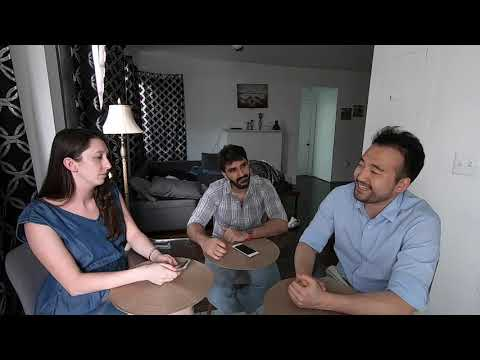

In [ ]:
from IPython.display import YouTubeVideo

# Change the Youtube_ID with the link to your group's video.
YOUTUBE_ID = ''
YouTubeVideo(YOUTUBE_ID)

In [ ]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4
# clear any previous outputs.
!rm -rf processed
# detect poses on the these 10 seconds.
!./OpenFace/build/bin/FaceLandmarkVidMulti -f video.mp4 -out_dir processed
# convert the result into MP4
!ffmpeg -y -loglevel info -i processed/video.avi output.mp4

[youtube] XtA6FQz8BHQ: Downloading webpage
[youtube] XtA6FQz8BHQ: Downloading MPD manifest
[dashsegments] Total fragments: 13
[download] Destination: youtube.mp4
[download] 100% of 21.00MiB in 00:03
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)